Hunter Bennett | Glass Lab | Kupffer Strains Project | 04 Feb 2021    

In [12]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Set working directory

In [13]:
dataDirectory = '/home/h1bennet/strains/data/H3K27Ac/ccl4_6week/'
workingDirectory = '/home/h1bennet/strains/results/02_Strains_CCl4_H3K27Ac/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [14]:
qc = ngs_qc(dataDirectory, 'atac')

/home/h1bennet/strains/data/H3K27Ac/ccl4_6week//
./ccl4_6week_qc/


<Figure size 432x288 with 0 Axes>

In [15]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other
00_C57_KNRM_H3K27Ac_CCl4_6weeks_NSL112_170622,10080042.0,183.0,0.007830,2.118,0.448,24774601.0,19708463.0,4441283.0,624855.0,0.795511,0.974778,NaN,NaN,NaN
00_C57_Kupffer_H3K27Ac_CCl4_6weeks_NSL105_170608,16153547.0,163.0,0.008124,1.371,0.458,26067901.0,20710202.0,4590579.0,767120.0,0.794471,0.970572,NaN,NaN,NaN
00_C57_Kupffer_H3K27Ac_CCl4_6weeks_NSL112_170622,9497305.0,107.0,0.007751,2.225,0.414,25810905.0,19395388.0,5620604.0,794913.0,0.751442,0.969202,NaN,NaN,NaN
00_C57_Kupffer_input_CCl4_6weeks_NSL105_170608,19282367.0,182.0,0.007876,1.114,0.396,27501286.0,19009372.0,7609497.0,882417.0,0.691218,0.967914,NaN,NaN,NaN
00_NCoRWT_Kupffer_H3K27Ac_CCl4_6weeks_N1A_160901,4536624.0,140.0,0.007334,4.406,0.515,23130978.0,18492772.0,3492477.0,1145729.0,0.799481,0.950468,NaN,NaN,NaN
00_NCoRWT_Kupffer_input_CCl4_6weeks_N1A_160901,13518319.0,146.0,0.005595,1.128,0.435,18080699.0,13536443.0,4315719.0,228537.0,0.748668,0.987360,NaN,NaN,NaN
01_balbc_Kupffer_H3K27Ac_CCl4_6weeks_Balb12A_161212,11415259.0,162.0,0.005099,1.216,-1.000,16130382.0,12859947.0,3022141.0,248294.0,0.797250,0.984607,NaN,NaN,NaN
01_balbc_Kupffer_H3K27Ac_CCl4_6weeks_Balb12B_161212,9980136.0,162.0,0.004497,1.227,-1.000,14442640.0,11262901.0,2941650.0,238089.0,0.779837,0.983515,NaN,NaN,NaN
01_balbc_Kupffer_H3K27Ac_CCl4_6weeks_Balb1A_160901,484199.0,133.0,0.000363,2.039,-1.000,4837748.0,888166.0,287511.0,3662071.0,0.183591,0.243022,NaN,NaN,NaN
01_balbc_Kupffer_H3K27Ac_CCl4_6weeks_Balb1B_160901,9625577.0,164.0,0.006872,1.944,-1.000,25512284.0,16966106.0,4852554.0,3693624.0,0.665017,0.855222,NaN,NaN,NaN


### Plot tag count distribution

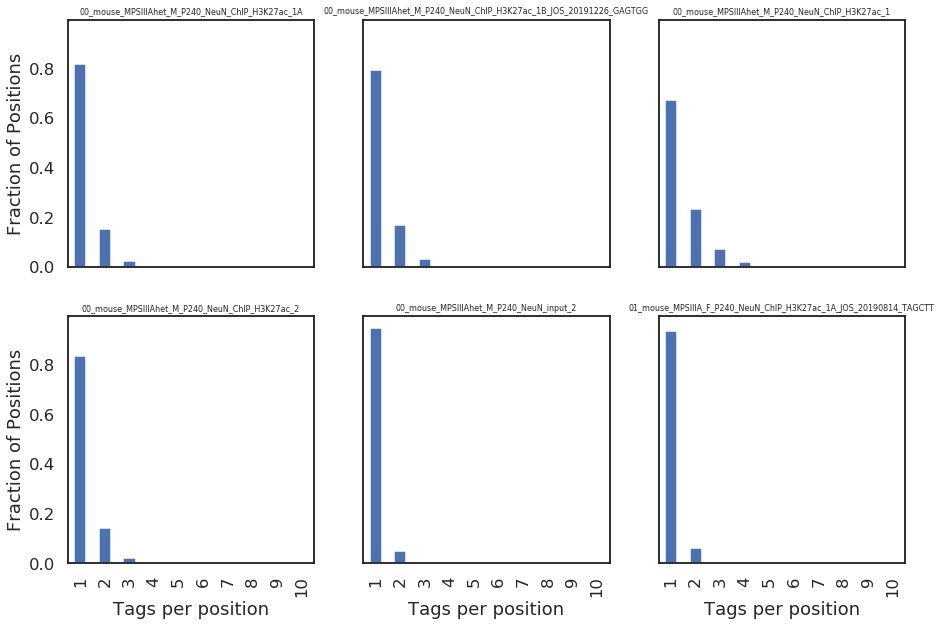

In [5]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(2,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|


In [8]:
makeMultiWigHub.pl hrb_strains_h3k27ac_ccl4_6week mm10 -force -color \
77,175,74 77,175,74 77,175,74 77,175,74 77,175,74 77,175,74 \
55,126,184 55,126,184 55,126,184 55,126,184 55,126,184 55,126,184 55,126,184 55,126,184 55,126,184 \
228,26,28 228,26,28 228,26,28 228,26,28 228,26,28 228,26,28 228,26,28 228,26,28 228,26,28 \
-d /gpfs/data01/glasslab/home/h1bennet/strains/data/H3K27Ac/ccl4_6week/*

SyntaxError: invalid syntax (<ipython-input-8-fec2aed4a072>, line 1)

 Based on the browser tracks and the qc for these samples this experiment will probably need to be redone.

# Find peaks

In [16]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./peak_files/ ]; then mkdir ./peak_files; fi

rm: cannot remove ‘./peakCalling_homer.sh’: No such file or directory


In [17]:
# set input directory
inputdir = "00_mouse_MPSIIIAhet_M_P240_NeuN_input_2_AL_20191122_CCAACA"

with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        if '00_C57' in tagdir:
            inputdir='00_C57_Kupffer_input_CCl4_6weeks_NSL105_170608'
        elif '01_balb' in tagdir:
            inputdir='01_balbc_Kupffer_input_CCl4_6weeks_Balb12AB_161212'
        elif '02_aj' in tagdir:
            inputdir='02_aj_Kupffer_input_CCl4_6weeks_AJ12AB_161212'
        
        find_peaks_fw = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', dataDirectory + '/' + inputdir,
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_fixedwidth_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', dataDirectory + '/' + inputdir, '-region',
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_variablewidth_peaks.tsv',
                          '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_fw))
        f.write(' '.join(find_peaks))

In [20]:
peak_stats={}

for td in np.sort(os.listdir('./peak_files/')):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [21]:
df

,total_peaks,ip_eff,peaks_filt_input,peaks_filt_local,peaks_filt_clonal
00_C57_KNRM_H3K27Ac_CCl4_6weeks_NSL112_170622_fixedwidth_peaks.tsv,16004.0,19.97,3734.0,3147.0,0.0
00_C57_KNRM_H3K27Ac_CCl4_6weeks_NSL112_170622_variablewidth_peaks.tsv,17943.0,33.45,297.0,0.0,4.0
00_C57_Kupffer_H3K27Ac_CCl4_6weeks_NSL105_170608_fixedwidth_peaks.tsv,17201.0,23.36,5285.0,3988.0,1.0
00_C57_Kupffer_H3K27Ac_CCl4_6weeks_NSL105_170608_variablewidth_peaks.tsv,19420.0,44.52,505.0,0.0,3.0
00_C57_Kupffer_H3K27Ac_CCl4_6weeks_NSL112_170622_fixedwidth_peaks.tsv,11013.0,7.15,4697.0,3330.0,0.0
00_C57_Kupffer_H3K27Ac_CCl4_6weeks_NSL112_170622_variablewidth_peaks.tsv,13850.0,14.24,460.0,0.0,0.0
00_C57_Kupffer_input_CCl4_6weeks_NSL105_170608_fixedwidth_peaks.tsv,0.0,0.00,471.0,0.0,0.0
00_C57_Kupffer_input_CCl4_6weeks_NSL105_170608_variablewidth_peaks.tsv,0.0,0.00,0.0,0.0,0.0
00_NCoRWT_Kupffer_H3K27Ac_CCl4_6weeks_N1A_160901_fixedwidth_peaks.tsv,16996.0,25.80,2211.0,4808.0,86.0
00_NCoRWT_Kupffer_H3K27Ac_CCl4_6weeks_N1A_160901_variablewidth_peaks.tsv,19677.0,42.36,136.0,0.0,111.0


### Write to files

In [22]:
df.loc[df.index.str.contains('variable'), :].to_csv('./variablewidth_peak_table.txt', sep='\t')
df.loc[df.index.str.contains('fixed'), :].to_csv('./fixedwidth_peak_table.txt', sep='\t') 